In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

07-02-2020
Understand the data
We will be using customer churn data from the telecom industry for this exercises. The data file is called Orange_Telecom_Churn_Data.csv
- Read the  data into df
- Display the top five rows
- Display the last three rows
- Check the total number of entries you have
- Check the No of features
- Print features Names(Column Names)
- Print the row indices of the dataframe
- Check the dtype of each and every columns
- Description for Numerical Column min,max,count,25%,50%,75%,std
- Description for the categorical Columns count,top,freq
- Missing value count column wise
- Total Missing values count in the DataFrame
- If there are any missing values replace them.
- Check the output for the info function
- Access 3,5,7 columns using iloc,loc and without using any of them
- How many unique states are there
- How many customers are churned
- How many are not churned   

In [23]:
df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/Intel%20Data/Orange_Telecom_Churn_Data.csv")
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [24]:
df.tail(3)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.9,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.1,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False
4999,VT,86,415,373-8058,no,yes,34,129.4,102,22.0,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,False


In [25]:
df.count().sum()

105000

In [26]:
df.shape[1]

21

In [27]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [28]:
# Print the row indices of the dataframe
df.index

RangeIndex(start=0, stop=5000, step=1)

In [29]:
# Check the dtype of each and every columns
# df.info()
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [30]:
# Description for Numerical Column min,max,count,25%,50%,75%,std
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [31]:
# Description for the categorical Columns count,top,freq
df.describe(include=object)

,state,phone_number,intl_plan,voice_mail_plan
count,5000,5000,5000,5000
unique,51,5000,2,2
top,WV,340-3011,no,no
freq,158,1,4527,3677


In [32]:
# Missing value count column wise
df.isna().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

In [33]:
# Total Missing values count in the DataFrame
df.isna().sum().sum()

0

In [34]:
# If there are any missing values replace them.

In [35]:
# Check the output for the info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [36]:
# Access 3,5,7 columns using iloc,loc and without using any of them
df.iloc[:,3:8:2]

,phone_number,voice_mail_plan,total_day_minutes
0,382-4657,yes,265.1
1,371-7191,yes,161.6
2,358-1921,no,243.4
3,375-9999,no,299.4
4,330-6626,no,166.7
...,...,...,...
4995,365-8751,yes,235.7
4996,334-9736,no,184.2
4997,333-6861,no,140.6
4998,394-2206,no,188.8


In [37]:
df.loc[:,["phone_number", "voice_mail_plan", "total_day_minutes"]]

,phone_number,voice_mail_plan,total_day_minutes
0,382-4657,yes,265.1
1,371-7191,yes,161.6
2,358-1921,no,243.4
3,375-9999,no,299.4
4,330-6626,no,166.7
...,...,...,...
4995,365-8751,yes,235.7
4996,334-9736,no,184.2
4997,333-6861,no,140.6
4998,394-2206,no,188.8


In [38]:
#How many unique states are there
df["state"].nunique()

51

In [39]:
df.head(1)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [40]:
# How many customers are churned
df["churned"].sum()
  

707

In [41]:
# How many are not churned 
features=df.drop("churned",axis=1)

In [ ]:
df.churned.value_count()

In [42]:
# Seperate the features and target
features =df.drop("churned",axis=1)
target=df["churned"]

In [43]:
features

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [44]:
target

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996     True
4997    False
4998    False
4999    False
Name: churned, Length: 5000, dtype: bool

In [45]:
# get the numerical column names from fetaures
num_col=pd.DataFrame(features.columns[features.dtypes!=object])
print("num_col :",num_col)

num_col :                                 0
0                  account_length
1                       area_code
2           number_vmail_messages
3               total_day_minutes
4                 total_day_calls
5                total_day_charge
6               total_eve_minutes
7                 total_eve_calls
8                total_eve_charge
9             total_night_minutes
10              total_night_calls
11             total_night_charge
12             total_intl_minutes
13               total_intl_calls
14              total_intl_charge
15  number_customer_service_calls


In [46]:
# Get the categorical column names from features
cat_col=features.columns[features.dtypes==object]
print(cat_col)

Index(['state', 'phone_number', 'intl_plan', 'voice_mail_plan'], dtype='object')


KeyError: 1

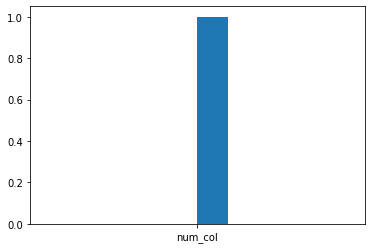

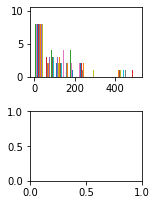

In [49]:
# Draw the histogram for all the numerical columns
plt.hist("num_col")
plt.figure(figsize=(5,30))
plt.subplots_adjust(hspace=.5,wspace=.5)
for i in range(len(num_col)):
    plt.subplot(16,2,2*i+1)
    plt.hist(df[num_col[i]])
    #plt.title(num_col[i]+"Histogram")

    

In [ ]:
# If there are skewed data columns apply np.log or np.log1p and overwrite 

# the columns with results

### 1. Applying KNN with Numerical Data Only

In [50]:
df.head(1)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [51]:
# Get the numerical columns data only into num_features
num_features = num_col
num_features

,0
0,account_length
1,area_code
2,number_vmail_messages
3,total_day_minutes
4,total_day_calls
5,total_day_charge
6,total_eve_minutes
7,total_eve_calls
8,total_eve_charge
9,total_night_minutes


In [ ]:
# from sklearn.model_selection import train_test_split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Split the data num_features and target into 80% for 

# training 20% for testing and random state 40
# store the results in X_train,X_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(num_features,target, test_size=0.2, random_state=40)

ValueError: Found input variables with inconsistent numbers of samples: [16, 5000]

In [ ]:
# Train the KNN with X_train,y_train

In [ ]:
#predict the output for X_train store it in variable y_out

# calculate the accuarcy for y_out,y_train

In [ ]:
#predict the output for X_test store it in variable y_pred

# calculate the accuarcy for y_pred,y_test

### 2. Applying KNN with Numerical scaled Data Only

In [ ]:
# Apply MinMaxSCaler for num_features and store the 
# result into num_features_sc

In [ ]:
# Split the data num_features_sc and target into 80% for 
# training 20% for testing and random state 40
# store the results in X_train_sc,X_test_sc,y_train,y_test

In [ ]:
# Train the KNN with X_train_sc,y_train_sc

In [ ]:
#predict the output for X_train_sc store it in variable y_out

# calculate the accuarcy for y_out,y_train

In [ ]:
#predict the output for X_test_sc store it in variable y_pred

# calculate the accuarcy for y_pred,y_test

### 3.Apply KNN with five numerical columns

In [ ]:
# Choose five columns in features 
sel_feature_names = # Give selected column names

In [ ]:
# Get the data of the selected columns into selected_features

In [ ]:
# Split the data selected_features and target into 80% for 
# training 20% for testing and random state 40
# store the results in X_train_sel,X_test_sel,y_train,y_test

In [ ]:
# Train the KNN with X_train_sel,y_train_sel

In [ ]:
#predict the output for X_train_sel store it in variable y_out

# calculate the accuarcy for y_out,y_train

In [ ]:
#predict the output for X_test_sel store it in variable y_pred

# calculate the accuarcy for y_pred,y_test

### 4.Apply KNN with Total data

In [ ]:
#  create a varible with name full_data with numerical columns data in the features 
# replaced with scaled values

#### Note the full_data should contain same number of columns as features. Where numerical column values are replaced with scaled data

In [ ]:
# Apply pd.get_dummies function for the dataframe full_data and assign the result to full_data

In [ ]:
# Check the number of columns in the full data

In [ ]:
# Split the full_data and target into 80% for 
# training 20% for testing and random state 40
# store the results in full_train,full_test_sel,y_train,y_test

In [ ]:
# Train the KNN with full_train,y_train_sel

In [ ]:
#predict the output for full_train store it in variable y_out

# calculate the accuarcy for y_out,y_train

In [ ]:
#predict the output for full_test store it in variable y_pred

# calculate the accuarcy for y_pred,y_test

###  Compare the training and testing scores for the above four cases.

   - Applying KNN with Numerical Data Only
   - Applying KNN with Numerical scaled Data Only
   - Apply KNN with five numerical columns
   - Apply KNN with Total data

